# TESLA 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [2]:
tsla = pd.read_csv('TSLA_5y_3mo.csv')
tsla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,12.367333,17.738001,11.799333,16.107332,16.107332,6214609500
1,2019-08-01,16.176666,22.722668,14.066667,20.994667,20.994667,7463227500
2,2019-11-01,21.087999,43.533333,20.617332,43.371334,43.371334,11581039500
3,2020-02-01,44.912666,64.599335,23.367332,52.125332,52.125332,19124989500
4,2020-05-01,50.333332,119.666000,45.535999,95.384003,95.384003,13606647000
5,2020-08-01,96.613335,167.496674,91.000000,129.346664,129.346664,12381988800
6,2020-11-01,131.333328,300.133331,130.766663,264.510010,264.510010,8053918800
7,2021-02-01,271.429993,293.500000,179.830002,236.479996,236.479996,6431550000
8,2021-05-01,234.600006,235.333328,182.326660,229.066666,229.066666,4780642500
9,2021-08-01,233.333328,371.736664,216.279999,371.333344,371.333344,3901292400


In [3]:
# Create a DataFrame
df = pd.DataFrame(tsla)

# Change the date to quarters
df['Date'] = pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.to_period('Q')
df_quarterly = df.groupby('Quarter').sum().reset_index()

## Plotting Data

Text(0.5, 1.0, "Tesla's Quarterly Stocks (2019-2024)")

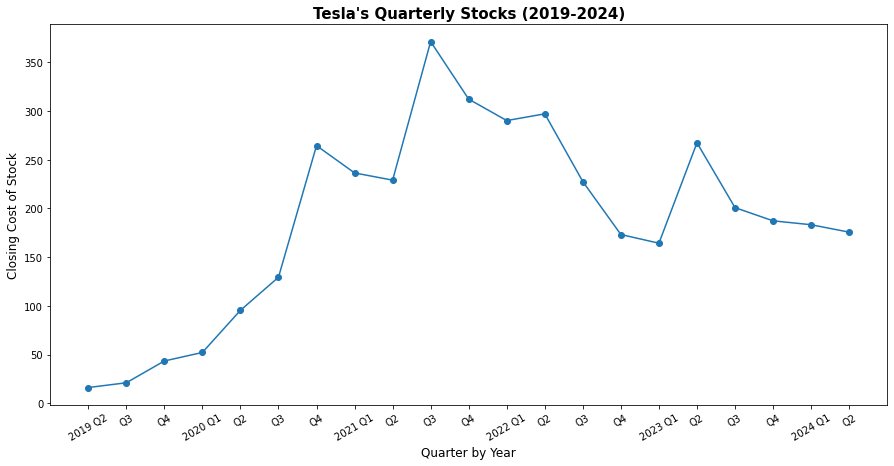

In [6]:
# Creating custom x-axis labels
df_quarterly['Year'] = df_quarterly['Quarter'].dt.year
df_quarterly['Q'] = df_quarterly['Quarter'].dt.quarter

# Display year starting Q1
year_starts = df_quarterly['Year'].diff().fillna(1).astype(bool)
labels = np.where(year_starts, df_quarterly['Year'].astype(str) + ' Q' + df_quarterly['Q'].astype(str), 'Q' + df_quarterly['Q'].astype(str))

# Plot the figure
plt.figure(figsize=(15, 7))
plt.plot(df_quarterly['Quarter'].astype(str), df_quarterly['Close'], marker='o')

# Label fonts
label_font = {'weight': 'normal', 'size': 12}
title_font = {'weight': 'bold', 'size': 15}

# Label names
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=30)
plt.xlabel('Quarter by Year', fontdict= label_font)
plt.ylabel('Closing Cost of Stock', fontdict= label_font)
plt.title('Tesla\'s Quarterly Stocks (2019-2024)', fontdict=title_font)
